<a href="https://colab.research.google.com/github/KhotShraddha27/ComputerVision/blob/main/cv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


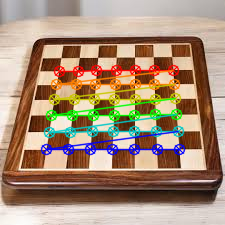

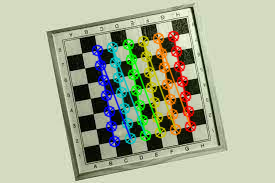

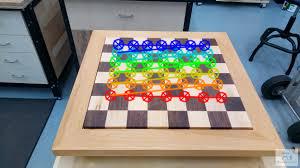

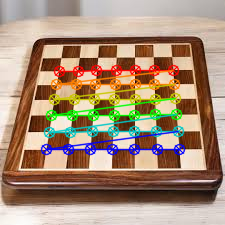

Camera matrix:
 [[219.2689589    0.         119.51537025]
 [  0.         207.00245746 172.47069407]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[ 0.10527237 -0.36638845 -0.02817803 -0.0235624   0.11153911]]


In [17]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Prepare object points (0,0,0), (1,0,0), ..., (6,5,0) # these are fixed in the real world (Z=0 for all since it's a flat board).
objp = np.zeros((6*7,3), np.float32) #You're creating the 3D object points corresponding to the checkerboard pattern (7 columns and 6 rows of inner corners).
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2) #generates a 2D grid of points from (0,0) to (6,5)

objpoints = []  # Will store 3D points (objp) for all images.
imgpoints = []  # Will store the corresponding 2D points detected from each image

# Load all images in the directory
images = glob.glob('/content/drive/MyDrive/opencv/*.jpg') #Uses glob to load all .jpg files from the specified directory

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None) #looks for the 7×6 inner corners on the checkerboard.

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(img, (7,6), corners, ret)
        cv2_imshow(img) # Use cv2_imshow instead of cv2.imshow
        # cv2.waitKey(100) # waitKey is not needed with cv2_imshow

# cv2.destroyAllWindows() # destroyAllWindows is not needed with cv2_imshow

# Calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print("Camera matrix:\n", mtx)
print("Distortion coefficients:\n", dist)

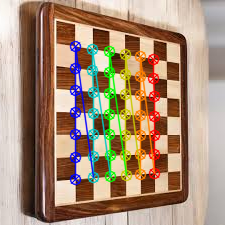

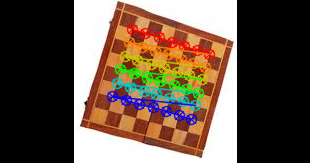

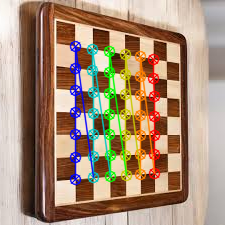

In [18]:
for fname in images:
    img = cv2.imread(fname)

    # Get image dimensions
    (h, w) = img.shape[:2]

    # Calculate center of the image
    center = (w // 2, h // 2)

    # Rotate the image by 90 degrees clockwise
    angle = -90  # negative for clockwise rotation
    scale = 1.0  # keep original scale

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Perform the rotation
    rotated_img = cv2.warpAffine(img, M, (w, h))

    gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(rotated_img, (7,6), corners, ret)
        cv2_imshow(rotated_img)

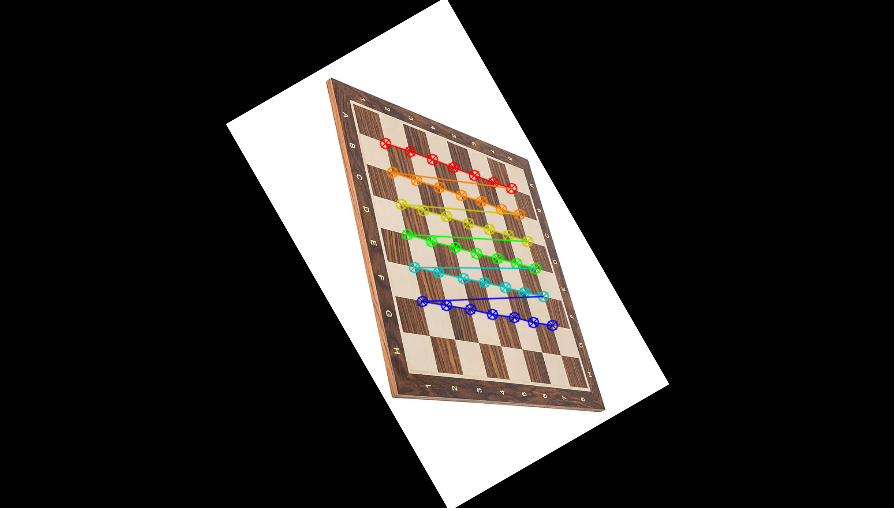

In [19]:
import cv2
import numpy as np
import glob
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Prepare object points (0,0,0), (1,0,0), ..., (6,5,0) # these are fixed in the real world (Z=0 for all since it's a flat board).
objp = np.zeros((6*7,3), np.float32) #You're creating the 3D object points corresponding to the checkerboard pattern (7 columns and 6 rows of inner corners).
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2) #generates a 2D grid of points from (0,0) to (6,5)

objpoints = []  # Will store 3D points (objp) for all images.
imgpoints = []  # Will store the corresponding 2D points detected from each image

# Load all images in the directory
images = glob.glob('/content/drive/MyDrive/opencv/*.jpg') #Uses glob to load all .jpg files from the specified directory

for fname in images:
    img = cv2.imread(fname)

    # Get image dimensions
    (h, w) = img.shape[:2]

    # Calculate center of the image
    center = (w // 2, h // 2)

    # Rotate the image by 90 degrees clockwise
    angle = -60  # negative for clockwise rotation
    scale = 0.5 # keep original scale

    # Get rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, scale)

    # Perform the rotation
    rotated_img = cv2.warpAffine(img, M, (w, h))

    gray = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2GRAY)

    ret, corners = cv2.findChessboardCorners(gray, (7,6), None)

    if ret:
        objpoints.append(objp)
        imgpoints.append(corners)

        cv2.drawChessboardCorners(rotated_img, (7,6), corners, ret)
        cv2_imshow(rotated_img)

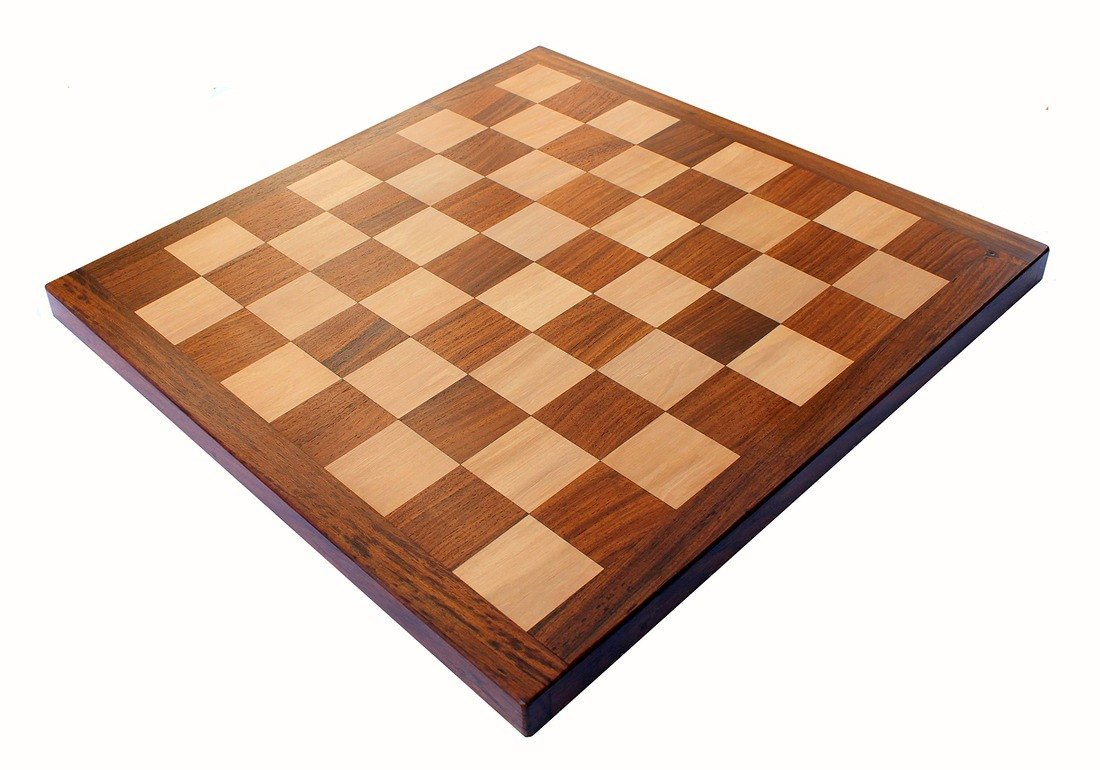

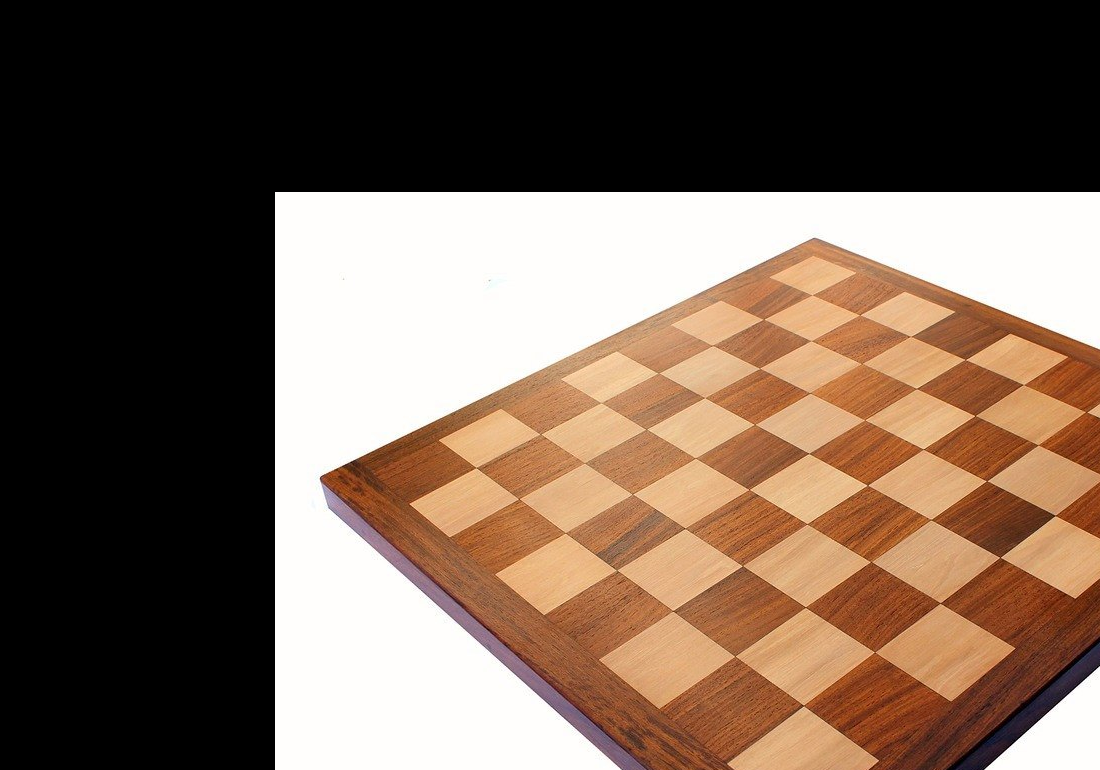

In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image_path = '/content/drive/MyDrive/opencv/c3.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Image not found or cannot be loaded from {image_path}")
else:
    height, width = image.shape[:2]
    tx, ty = width // 4, height // 4
    T = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_image = cv2.warpAffine(image, T, (width, height))
    cv2_imshow(image)
    cv2_imshow(translated_image)
